<a href="https://colab.research.google.com/github/anamarigarzon/Predictive_and_Proactive_Maintenance_in_Power_Systems/blob/main/Indoor-Power-Systems/IR_image_analysis_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thermographic Image Analysis - Motor**

Dataset: https://ieeexplore-ieee-org.ez.urosario.edu.co/document/9349599

In this project Infrared Thermographic Images are processed to identify and classify motor failures.

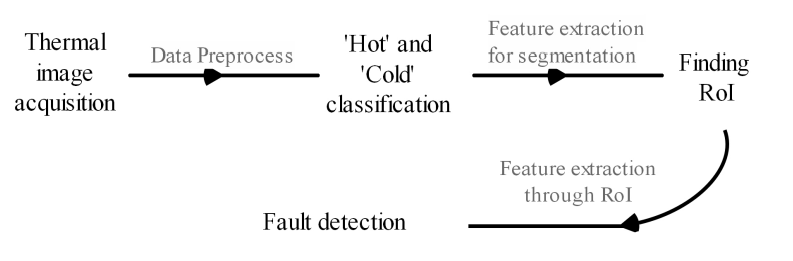


Packages:

In [1]:
import cv2 # Computer Vision Implementations in Python
import matplotlib.pyplot as plt # Create graphic visualizations in Python
import numpy as np #support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd
import os
from google.colab import drive

** **

### **DATA PREPROCESS**

The first step is to get access to the images folder. This project was coded in Google Colab and the images were stored in a personal Google Drive folder. If you wish to execute it you can skip this process as the vectorization is stored in "dataset_motor.csv" that is included in the repository.

In [2]:
drive.mount("/content/drive") # Access drive folder for Google Colab

Mounted at /content/drive


Now, as the images have the same shape (240x320), we create a dataset that has a first column with the name of the file. The next step is to import the images in BGR space color (by defect in open cv), vectorize them by pixel and add a column with the image data.

After that, the images are converted to gray and we get the maximum, minimum, mean and standard deviation of the values in gray scale, and we add them to the dataset. Finally, we add the label column.

To add the column with the image data we need to encode and decode the image. vectorizing it, converting it into a string. So next we have the code and decode functions:

In [3]:
def vectorize_image(image_data):
  image_string = ''
  for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
      for k in range(image_data.shape[2]):
        image_string += str(image_data[i][j][k])+','
  return image_string

def reverse_img_vectorization(image_string, num_rows, num_columns, space_color_dim):
  img_list = image_string.split(',')
  count = 0
  image_arr = []
  for i in range(num_rows):
    column = []
    for j in range(num_columns):
      color = []
      for k in range(space_color_dim):
        color.append(int(img_list[count]))
        count += 1
      column.append(color)
    image_arr.append(column)
  return image_arr

Creation of the dataset

In [4]:
dataset_motor = pd.DataFrame() # Create dataset for the motor
labels = ['Rotor-0','Noload','Fan','A50','A30','A10','A&C30','A&C10','A&C&B30','A&B50','A&C&B10'] # Failure or state label
hot_labels = ['Rotor-0','Fan','A50','A&C&B30','A&B50']
cold_labels = ['Noload','A30','A10','A&C30','A&C10','A&C&B10']

filenames = [] # list to store filenames
image_data = [] # list to store image data
labels_list = [] # list to store labels
max_values = [] # list to store max value
min_values = [] # list to store min value
mean_values = [] # list to store mean value
std_values = [] # list to store standard deviation
temp_labels = [] # list to store temperature labels

# Importing images
for label in labels:
  folder_name = '/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/'+ label # Access the image
  for filename in os.listdir(folder_name):
    filenames.append(str(f'{filename}'))
    image_file = f'{folder_name}/{filename}' # name of the file
    image_cv_read = np.array(cv2.imread(image_file)) # read image file
    image_gray = np.array(cv2.cvtColor(image_cv_read, cv2.COLOR_BGR2GRAY)) # image file in grayscale

    # Get values from grayscale image
    max_value = image_gray.max()
    min_value = image_gray.min()
    mean_value = np.mean(image_gray)
    std_value = np.std(image_gray)

    # Temperature labels
    if label in hot_labels:
      temp_label = 1 # cold images label = 0
    elif label in cold_labels:
      temp_label = 0 # cold images label = 0
    else:
      print('error')
      print(label)

    temp_labels.append(temp_label)

    # Add values to lists
    image_data.append(vectorize_image(image_cv_read))
    labels_list.append(label)
    max_values.append(max_value)
    min_values.append(min_value)
    mean_values.append(mean_value)
    std_values.append(std_value)


dataset_motor['filename'] = filenames
dataset_motor['image_data_BGR'] = image_data
dataset_motor['max_value'] = max_values
dataset_motor['min_value'] = min_values
dataset_motor['mean_value'] = mean_values
dataset_motor['std_value'] = std_values
dataset_motor['temp_label'] = temp_labels
dataset_motor['label'] = labels_list

dataset_motor

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label
0,r057.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.222552,55.725256,1,Rotor-0
1,r038.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,21,53.324805,51.939685,1,Rotor-0
2,r055.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.050365,55.156260,1,Rotor-0
3,r050.bmp,"133,1,56,133,1,56,133,1,56,133,1,56,133,1,56,1...",210,23,59.148633,54.656517,1,Rotor-0
4,r040.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,20,53.563932,52.216708,1,Rotor-0
...,...,...,...,...,...,...,...,...
364,108.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",39,12,15.975573,7.649547,0,A&C&B10
365,127.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.382044,7.000189,0,A&C&B10
366,116.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",38,12,15.641836,7.346258,0,A&C&B10
367,130.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.546198,7.197309,0,A&C&B10


Export data to csv


In [5]:
dataset_motor.to_csv('dataset_motor.csv')

### **'HOT' AND 'COLD' CLASSIFICATION**

To classify between hot and cold images, the maximum values of the pixel are taken.

In [6]:
cold_images_max = np.array(dataset_motor[dataset_motor['temp_label'] == 0]['max_value'])
hot_images_max = np.array(dataset_motor[dataset_motor['temp_label'] == 1]['max_value'])

In [7]:
cold_y_values = np.empty(np.shape(np.array(cold_images_max)),dtype=np.int64)
cold_y_values.fill(0)

hot_y_values = np.empty(np.shape(np.array(hot_images_max)),dtype=np.int64)
hot_y_values.fill(1)


In [8]:
x_values = np.concatenate((cold_images_max, hot_images_max))
y_values = np.concatenate((cold_y_values, hot_y_values))

Split train and test data

In [9]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, random_state=1)

Explore train data

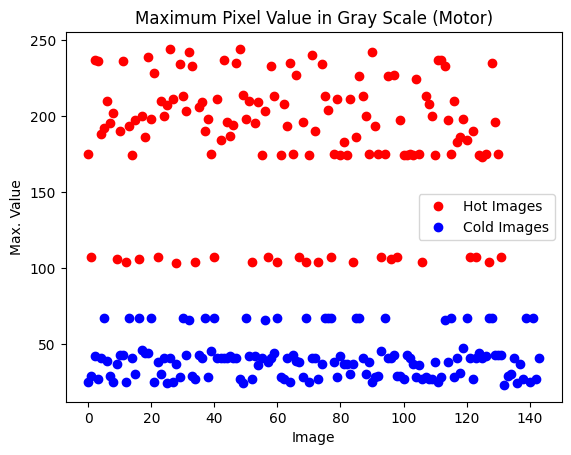

In [10]:
# Plot train data
plt.figure()
plt.title('Maximum Pixel Value in Gray Scale (Motor)')
plt.plot(X_train[y_train==1],'o',color='red')
plt.plot(X_train[y_train==0],'o',color='blue')
plt.legend(["Hot Images","Cold Images"])
plt.xlabel('Image')
plt.ylabel('Max. Value')
plt.show()

As it is shown in the figure, there is a clear difference between the maximum values of the pixels of the cold and the hot images. In this sense, the classification can be done by setting a linear threshold using SVM

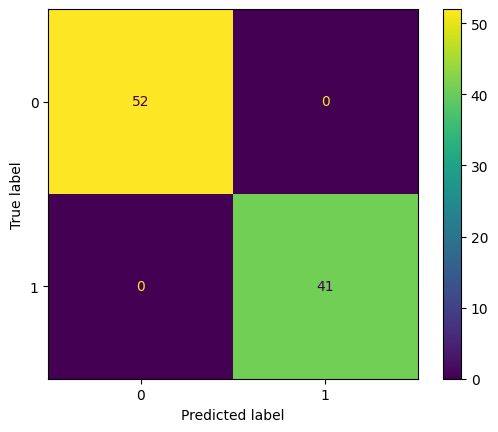

In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf = svm.SVC(random_state=0)
clf.fit(X_train.reshape(-1, 1), y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

It makes a perfect classification (which is not surprising due to the fact that the classes are quite distant). However, from the plot of the train data it is evident that the data is grouped in more than two subgroups focusing only on the max_value pixel. In this sense, we are going to explore the dataset with KMeans trying to distinguish those subgroups and the number of clusters is going to be determined through the elbow method.

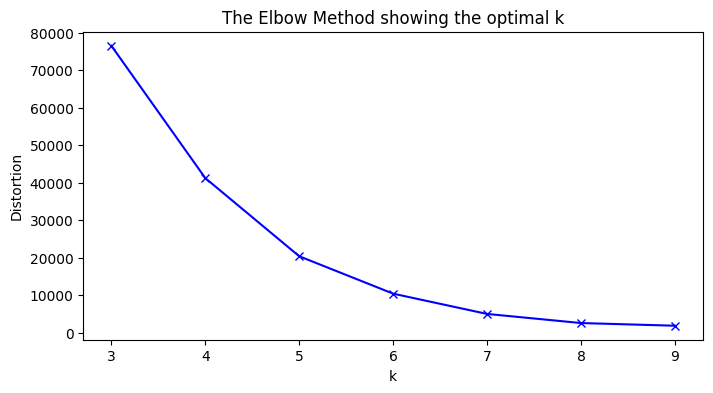

In [12]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

distortions = []
K = range(3,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=28)
    kmeanModel.fit(X_train.reshape(-1, 1))
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It is evident that for 2 < k < 10 the "elbow" is 5. So the KMeans model will be implemented with k = 5.

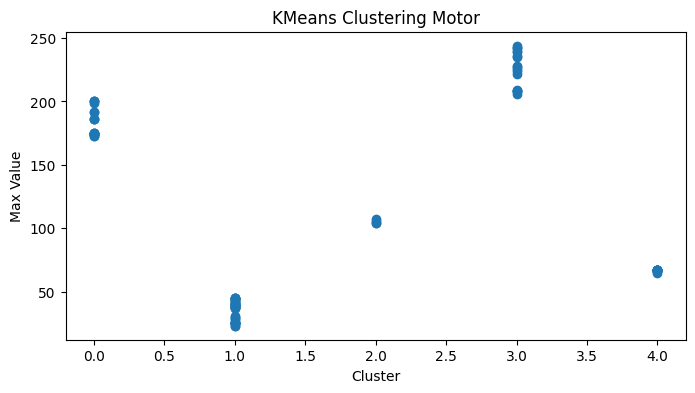

In [13]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(X_train.reshape(-1, 1))
y_kmeans = kmeanModel.predict(X_test.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.scatter(y_kmeans,X_test.reshape(-1, 1), cmap=plt.cm.Set1)
plt.xlabel('Cluster')
plt.ylabel('Max Value')
plt.title('KMeans Clustering Motor')
plt.show()

To find the Region of Interest (RoI), the cluster classification will be added to the dataset and the segmentation parameters will be assigned conveniently according to their cluster classification.

In [14]:
max_values_for_classification = np.array(dataset_motor['max_value'])
clusters_labels = kmeanModel.predict(max_values_for_classification.reshape(-1, 1))
dataset_motor['clusters'] = clusters_labels
dataset_motor

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label,clusters
0,r057.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.222552,55.725256,1,Rotor-0,3
1,r038.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,21,53.324805,51.939685,1,Rotor-0,0
2,r055.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,135,1,59,1...",213,24,61.050365,55.156260,1,Rotor-0,3
3,r050.bmp,"133,1,56,133,1,56,133,1,56,133,1,56,133,1,56,1...",210,23,59.148633,54.656517,1,Rotor-0,3
4,r040.bmp,"126,1,43,126,1,43,126,1,43,126,1,43,126,1,43,1...",200,20,53.563932,52.216708,1,Rotor-0,0
...,...,...,...,...,...,...,...,...,...
364,108.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",39,12,15.975573,7.649547,0,A&C&B10,1
365,127.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.382044,7.000189,0,A&C&B10,1
366,116.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",38,12,15.641836,7.346258,0,A&C&B10,1
367,130.bmp,"94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0,5,94,0...",37,12,15.546198,7.197309,0,A&C&B10,1


Export data to csv


In [15]:
dataset_motor.to_csv('dataset_motor_with_clusters.csv')

Selection of one image per cluster to draw the final masks

In [16]:
print(dataset_motor[dataset_motor['filename'] == '200.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == '270.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == '110.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == '315.bmp']['clusters'])
print(dataset_motor[dataset_motor['filename'] == 'f091.bmp']['clusters'])

206    4
Name: clusters, dtype: int32
83    0
Name: clusters, dtype: int32
345    1
Name: clusters, dtype: int32
337    3
Name: clusters, dtype: int32
79    2
Name: clusters, dtype: int32


### **IDENTIFYING RoI (REGION OF INTEREST)**

MANUAL SEGMENTATION

Importation of 5 masks, one for each cluster.

In [17]:
# Import images
img_315 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/A&B50/315.bmp')
img_f091 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/Fan/f091.bmp')
img_110 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/A&C&B10/110.bmp')
img_200 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/A&C30/200.bmp')
img_270 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/A50/270.bmp')



# Import masks
manual_mask_315 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/manual_masks/315_mask.bmp')
manual_mask_f091 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/manual_masks/f091_mask.bmp')
manual_mask_110 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/manual_masks/110_mask.bmp')
manual_mask_200 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/manual_masks/200_mask.bmp')
manual_mask_270 = cv2.imread('/content/drive/My Drive/IR_Images/Image_classification/IR-Motor-bmp/manual_masks/270_mask.bmp')



   It is necesary to convert images from BGR TO RGB in order to make a good visualization of the IR colors

In [18]:
# RGB images
img_315_rgb = cv2.cvtColor(img_315, cv2.COLOR_BGR2RGB)
img_f091_rgb = cv2.cvtColor(img_f091, cv2.COLOR_BGR2RGB)
img_110_rgb = cv2.cvtColor(img_110, cv2.COLOR_BGR2RGB)
img_200_rgb = cv2.cvtColor(img_200, cv2.COLOR_BGR2RGB)
img_270_rgb = cv2.cvtColor(img_270, cv2.COLOR_BGR2RGB)

# RGB masks
manual_mask_315_rgb = cv2.cvtColor(manual_mask_315, cv2.COLOR_BGR2RGB)
manual_mask_f091_rgb = cv2.cvtColor(manual_mask_f091, cv2.COLOR_BGR2RGB)
manual_mask_110_rgb = cv2.cvtColor(manual_mask_110, cv2.COLOR_BGR2RGB)
manual_mask_200_rgb = cv2.cvtColor(manual_mask_200, cv2.COLOR_BGR2RGB)
manual_mask_270_rgb = cv2.cvtColor(manual_mask_270, cv2.COLOR_BGR2RGB)

The gray images are also required to create and compare the masks

In [19]:
# gray images
img_315_gray = cv2.cvtColor(img_315, cv2.COLOR_BGR2GRAY)
img_f091_gray = cv2.cvtColor(img_f091, cv2.COLOR_BGR2GRAY)
img_110_gray = cv2.cvtColor(img_110, cv2.COLOR_BGR2GRAY)
img_200_gray = cv2.cvtColor(img_200, cv2.COLOR_BGR2GRAY)
img_270_gray = cv2.cvtColor(img_270, cv2.COLOR_BGR2GRAY)

# gray masks
manual_mask_315_gray = cv2.cvtColor(manual_mask_315, cv2.COLOR_BGR2GRAY)
manual_mask_f091_gray = cv2.cvtColor(manual_mask_f091, cv2.COLOR_BGR2GRAY)
manual_mask_110_gray = cv2.cvtColor(manual_mask_110, cv2.COLOR_BGR2GRAY)
manual_mask_200_gray = cv2.cvtColor(manual_mask_200, cv2.COLOR_BGR2GRAY)
manual_mask_270_gray = cv2.cvtColor(manual_mask_270, cv2.COLOR_BGR2GRAY)

Image visualization:

To create the mask (which only has black and white pixels) that we will compare with the automated segmentation, all pixels that have values greater than zero in the gray images will be converted to pixels with values equal t0 255.

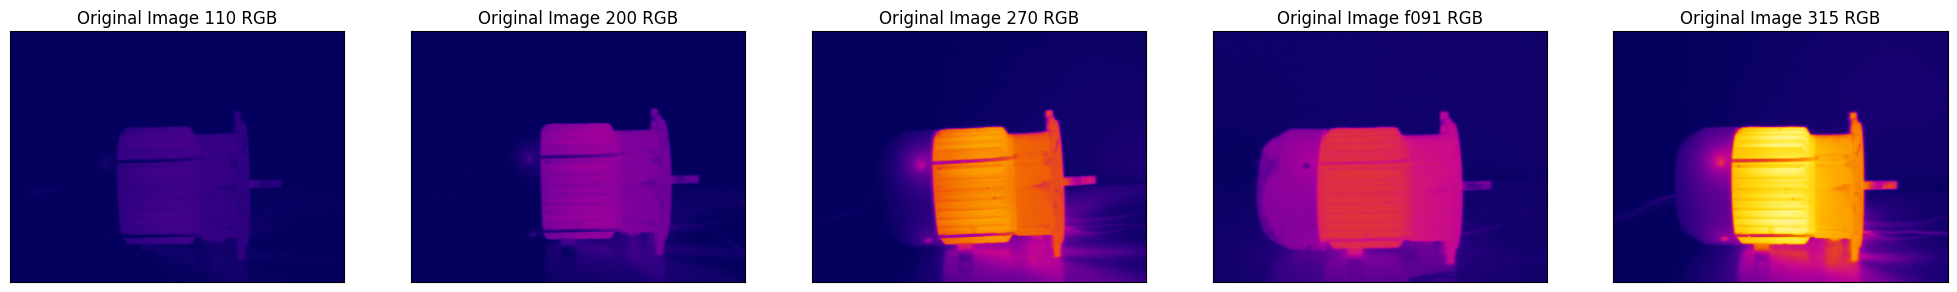

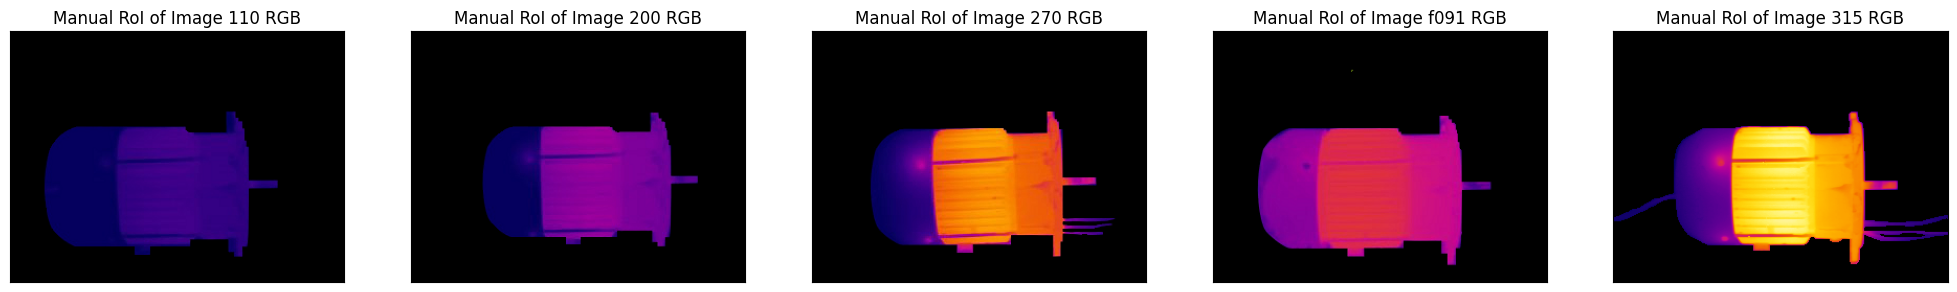

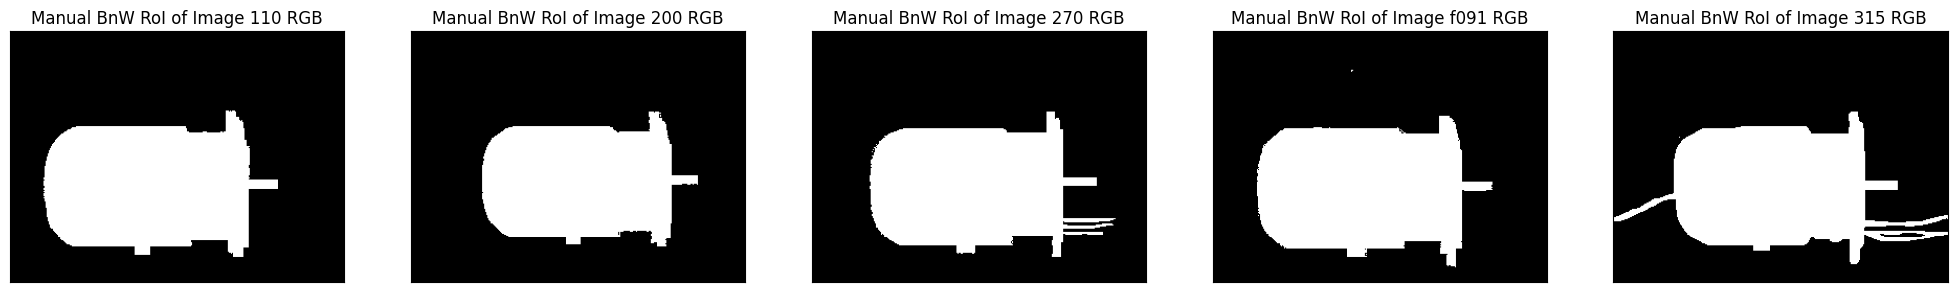

In [20]:
# Visualize original images vs masks (RGB)

plt.figure(figsize=(25,5)) # Create figure of dimensions 25 x 5

plt.subplot(151) # Locate image
plt.title('Original Image 110 RGB') # Title
plt.imshow(img_110_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(152) # Locate image
plt.title('Original Image 200 RGB') # Title
plt.imshow(img_200_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(153) # Locate image
plt.title('Original Image 270 RGB') # Title
plt.imshow(img_270_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(154) # Locate image
plt.title('Original Image f091 RGB') # Title
plt.imshow(img_f091_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(155) # Locate image
plt.title('Original Image 315 RGB') # Title
plt.imshow(img_315_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

plt.figure(figsize=(25,5)) # Create figure of dimensions 25 x 5

plt.subplot(151) # Locate mask
plt.title('Manual RoI of Image 110 RGB') # Title
plt.imshow(manual_mask_110_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(152) # Locate mask
plt.title('Manual RoI of Image 200 RGB') # Title
plt.imshow(manual_mask_200_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(153) # Locate mask
plt.title('Manual RoI of Image 270 RGB') # Title
plt.imshow(manual_mask_270_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(154) # Locate mask
plt.title('Manual RoI of Image f091 RGB') # Title
plt.imshow(manual_mask_f091_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(155) # Locate mask
plt.title('Manual RoI of Image 315 RGB') # Title
plt.imshow(manual_mask_315_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

manual_mask_110_BnW = manual_mask_110_gray # Take gray scale image
manual_mask_110_BnW[manual_mask_110_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_200_BnW = manual_mask_200_gray # Take gray scale image
manual_mask_200_BnW[manual_mask_200_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_270_BnW = manual_mask_270_gray # Take gray scale image
manual_mask_270_BnW[manual_mask_270_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_f091_BnW = manual_mask_f091_gray # Take gray scale image
manual_mask_f091_BnW[manual_mask_f091_BnW > 0] = 255 # Convert every non-black pixel to white

manual_mask_315_BnW = manual_mask_315_gray # Take gray scale image
manual_mask_315_BnW[manual_mask_315_BnW > 0] = 255 # Convert every non-black pixel to white

# Visualize Black and White masks

plt.show() # Show plot with images

plt.figure(figsize=(25,5)) # Create figure of dimensions 25 x 5

plt.subplot(151) # Locate mask
plt.title('Manual BnW RoI of Image 110 RGB') # Title
plt.imshow(manual_mask_110_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(152) # Locate mask
plt.title('Manual BnW RoI of Image 200 RGB') # Title
plt.imshow(manual_mask_200_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(153) # Locate mask
plt.title('Manual BnW RoI of Image 270 RGB') # Title
plt.imshow(manual_mask_270_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(154) # Locate mask
plt.title('Manual BnW RoI of Image f091 RGB') # Title
plt.imshow(manual_mask_f091_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(155) # Locate mask
plt.title('Manual BnW RoI of Image 315 RGB') # Title
plt.imshow(manual_mask_315_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images



The masks obtained will be the ones that will be compared with those generated by the segmentation generated with computer vision carried out below.

**SEGMENTATION USING MACHINE LEARNING AND COMPUTER VISION**

*The segmentation process will be visualized with image 315, and the results with the other 4 images will be displayed at the end*

First, the contrast of the images is enhaced in order to distinguish the features in a better way

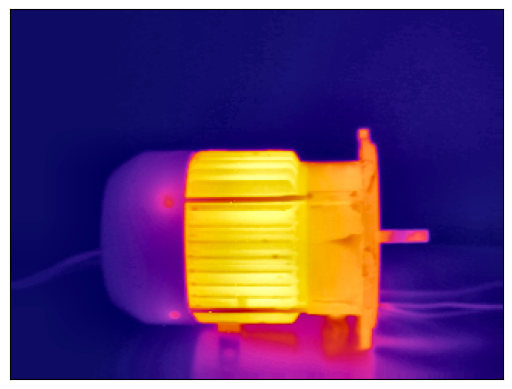

In [21]:
# converting to LAB color space
lab= cv2.cvtColor(img_315_rgb, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg_315_rgb = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img_315_rgb = cv2.cvtColor(limg_315_rgb, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
plt.figure()
plt.imshow(enhanced_img_315_rgb) # Select image
plt.xticks([]), plt.yticks([]) # Erase axis
plt.show()

Now, the enhaced image is converted to gray scale.

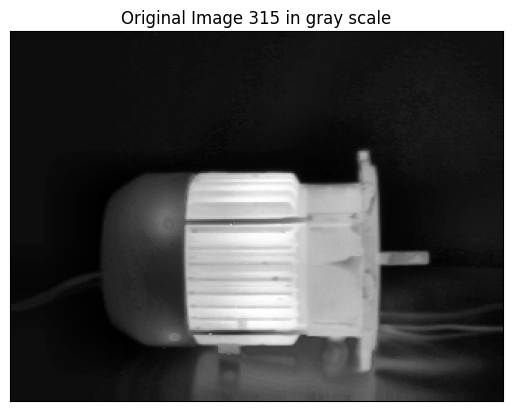

In [22]:
img_315_gray = cv2.cvtColor(enhanced_img_315_rgb, cv2.COLOR_RGB2GRAY)

plt.figure() # Create figure
plt.title('Original Image 315 in gray scale') # Title
plt.imshow(img_315_gray,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis
plt.show() # Show image

It can be observed that although some shadows (region that we want to eliminate) have greater intensity than parts that belong to the region of interest, the sections of the RoI have better defined edges. On the other hand, some cables stand out little or not at all from the background.

The first step is to carry out an OTSU segmentation over the gray image


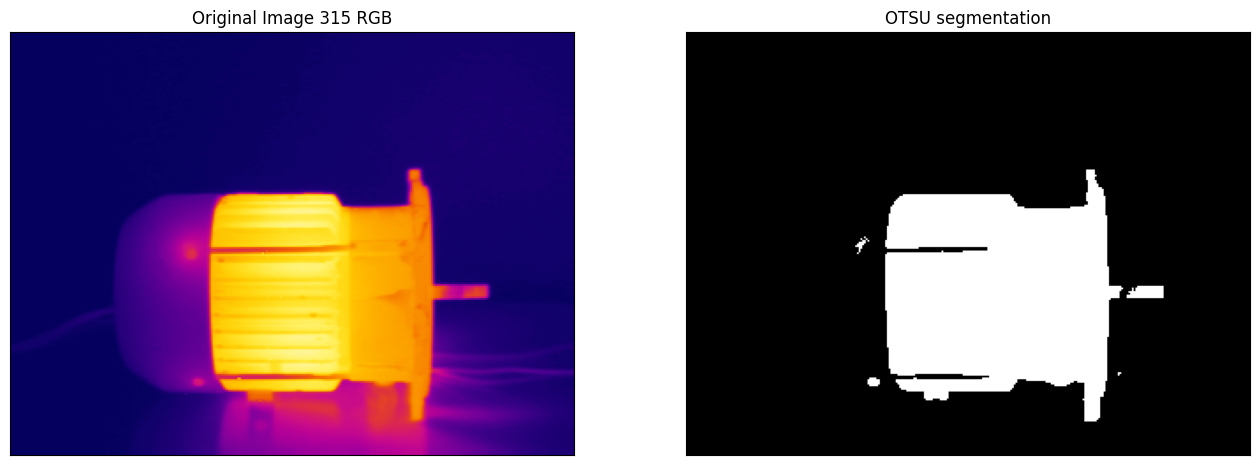

In [23]:
[_,OTSU] = cv2.threshold(img_315_gray, 0, 255, cv2.THRESH_OTSU)

# Visualize original images vs masks (RGB)

plt.figure(figsize=(16,8)) # Create figure of dimensions 16 x 8

plt.subplot(121) # Locate image
plt.title('Original Image 315 RGB') # Title
plt.imshow(img_315_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(122) # Locate mask
plt.title('OTSU segmentation')
plt.imshow(OTSU, cmap='gray')
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

It can be observed that the brightest part of the motor is included, but the cables and the purple area is ignore. So now we proceed to make a second OTSU segmentation ignoring the already segmented area. The problem with the second segmentation is that for the shadow is considered and is attached to the area we want to keep.

To eliminate the shadow, the mask is eroded 7 times such that the shadow is separated to the back part of the motor.

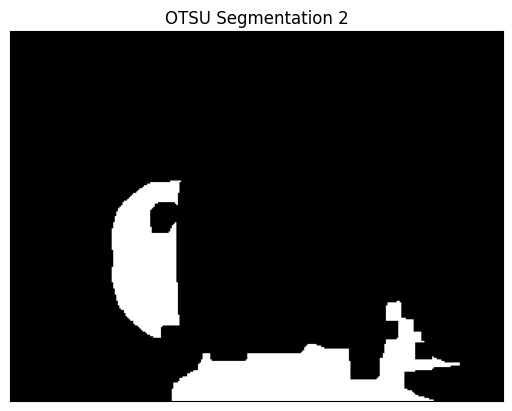

In [24]:
# OTSU 2

#Create a simple ones kernel
kernel_ones= np.ones((3,3), np.uint8)

img_temp = np.copy(img_315_gray)
img_temp[OTSU == 255] = 0
img_temp_erode = cv2.erode(img_temp, kernel_ones, iterations=5)
[_,OTSU2] = cv2.threshold(img_temp_erode, 0, 255, cv2.THRESH_OTSU)

plt.figure()
plt.title('OTSU Segmentation 2')
plt.imshow(OTSU2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

We identify the components

number of objects 3


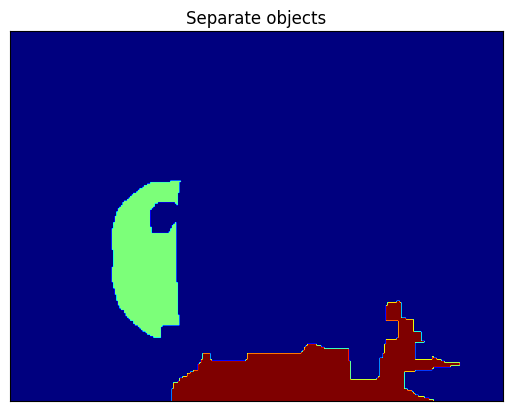

In [25]:
[cnt, markers] = cv2.connectedComponents(OTSU2)
print("number of objects", cnt)

plt.figure()
plt.title('Separate objects')
plt.imshow(markers,cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

We keep the components of interest only, the shadow is eliminated and afterwards, the image is under dilatation for 7 iterations. Finally, the second OTSU segmentation is added to the first segmentation

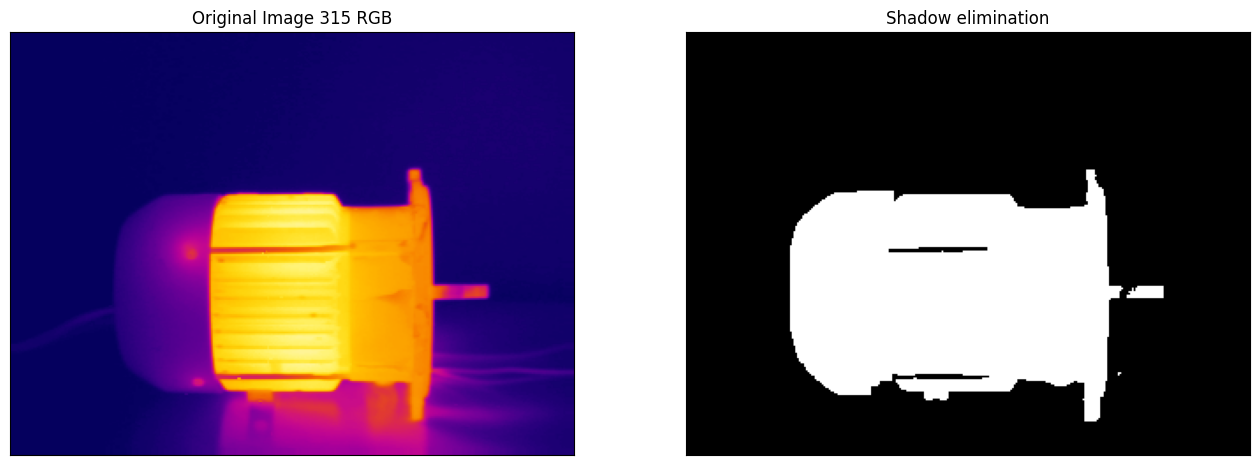

In [26]:
mask1 = np.uint8(markers==1)
mask1 = cv2.dilate(mask1, kernel_ones, iterations=7)
OTSU[mask1 > 0] = 255
OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)
OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)

plt.figure(figsize=(16,8)) # Create figure of dimensions 16 x 8

plt.subplot(121) # Locate image
plt.title('Original Image 315 RGB') # Title
plt.imshow(img_315_rgb,cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(122) # Locate mask
plt.title('Shadow elimination')
plt.imshow(OTSU, cmap='gray')
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

Following the previous process, we can obtain a pretty good segmentation. how ever, the cables are ignored. To segment the cables we will use a Canny edge detector at the first and final part of the x axis, and the identified edges wil be dilated.

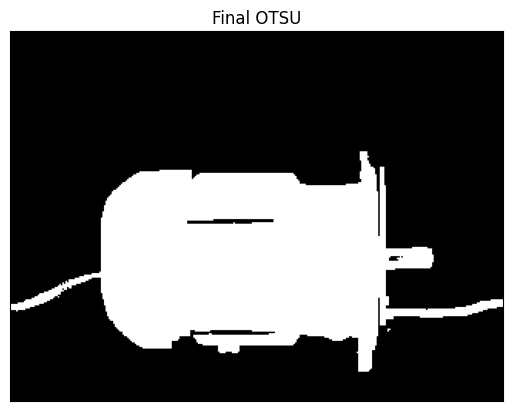

In [27]:
cables1 = img_315_gray[:,:65]
cables2 = img_315_gray[:,240:]
[_,cables_1_OTSU] = cv2.threshold(cables1, 25, 255, cv2.THRESH_BINARY)
cables_2_OTSU = cv2.dilate(cv2.Canny(cables2,0,255), kernel_ones, iterations=2)
OTSU[:,:65] = cv2.add(OTSU[:,:65],cables_1_OTSU)
OTSU[:,240:] = cv2.add(OTSU[:,240:],cables_2_OTSU)

plt.figure()
plt.title('Final OTSU')
plt.imshow(OTSU, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()



Visualize final result vs manual mask

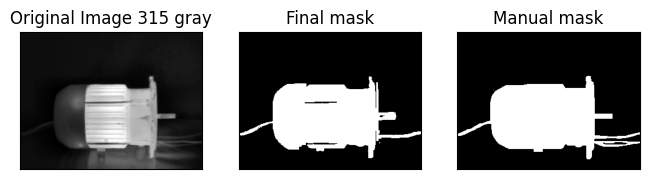

In [28]:
# Visualize final result vs manual mask

plt.figure(figsize=(8,24)) # Create figure of dimensions 8 x 24

plt.subplot(131) # Locate image
plt.title('Original Image 315 gray') # Title
plt.imshow(img_315_gray,cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(132) # Locate mask
plt.title('Final mask') # Title
plt.imshow(OTSU, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(133) # Locate mask
plt.title('Manual mask') # Title
plt.imshow(manual_mask_315_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

Next, the similarity of the automated mask and the manual mask is compared with the Jaccard Score

In [29]:
from sklearn.metrics import jaccard_score

J = jaccard_score(manual_mask_315_BnW, OTSU, average='micro')
print("Jaccard score:", J*100, "%")

Jaccard score: 89.37308868501529 %


Next, we introduce functions that generalize the previous steps, starting by the contrast modification in the RGB space and then the definition of the RoI:

In [30]:
 def increase_contrast_RGB2GRAY(img_rgb):
  # converting to LAB color space
  lab= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)
  l_channel, a, b = cv2.split(lab)

  # Applying CLAHE to L-channel
  # feel free to try different values for the limit and grid size:
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl = clahe.apply(l_channel)

  # merge the CLAHE enhanced L-channel with the a and b channel
  limg_rgb = cv2.merge((cl,a,b))

  # Converting image from LAB Color model to BGR color spcae
  enhanced_img_rgb = cv2.cvtColor(limg_rgb, cv2.COLOR_LAB2BGR)
  img_gray = cv2.cvtColor(enhanced_img_rgb, cv2.COLOR_RGB2GRAY)

  return img_gray

According to the cluster of the image, the parameters and the process will slightly vary.

In [31]:
def find_RoI(img_rgb,cluster):

  img_gray = increase_contrast_RGB2GRAY(img_rgb)
  # OTSU 1
  [_,OTSU] = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
  kernel_ones= np.ones((3,3), np.uint8)#Create a simple ones kernel

  # Separating shadow from object for the images the the higher max_value cluster
  if cluster == 4:
    # OTSU 2
    img_temp = np.copy(img_gray)
    img_temp[OTSU == 255] = 0
    img_temp_erode = cv2.erode(img_temp, kernel_ones, iterations=5)
    [_,OTSU2] = cv2.threshold(img_temp_erode, 0, 255, cv2.THRESH_OTSU)
    [cnt, markers] = cv2.connectedComponents(OTSU2)
    mask1 = np.uint8(markers==1)
    mask1 = cv2.dilate(mask1, kernel_ones, iterations=7)
    OTSU[mask1 > 0] = 255
    #OTSU1 = cv2.dilate(OTSU, kernel_ones, iterations=3)

  # Add back part for cold images
  if cluster == 1:
    R1,G1,B1 = cv2.split(img_rgb)
    img_sum_channels = cv2.add(R1[90:210, :125],B1[90:210,:125])
    th=100
    [_, seg1]=cv2.threshold(img_sum_channels, th, 255, cv2.THRESH_BINARY)
    OTSU[90:210, :125] = seg1

  if cluster == 0 or cluster == 3:
    kernel_ellipse= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    backpart = OTSU[:, 110:175]
    backpart = cv2.erode(backpart, kernel_ellipse, iterations=4)
    backpart = cv2.dilate(backpart, kernel_ellipse, iterations=5)
    OTSU[:, 60:125] = backpart


  #Adding the cables
  cables1 = img_gray[:,:65]
  cables2 = img_gray[:,240:]
  [_,cables_1_OTSU] = cv2.threshold(cables1, 25, 255, cv2.THRESH_BINARY)
  cables_2_OTSU = cv2.dilate(cv2.Canny(cables2,0,255), kernel_ones, iterations=2)
  if cluster != 2:
    OTSU[:,:65] = cv2.add(OTSU[:,:65],cables_1_OTSU)
    OTSU[:,240:] = cv2.add(OTSU[:,240:],cables_2_OTSU)

  return OTSU


Visualize the automated result vs the manual masks

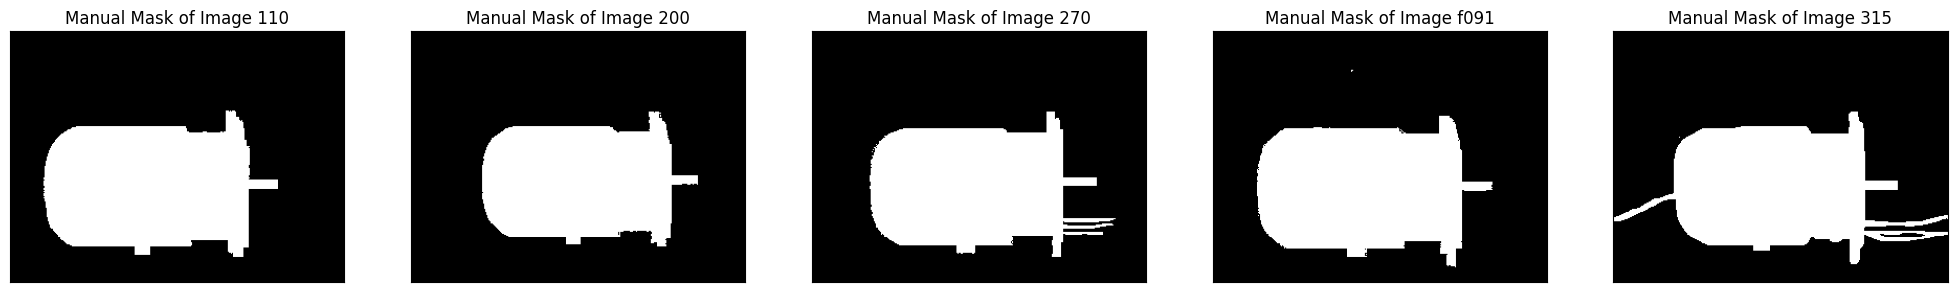

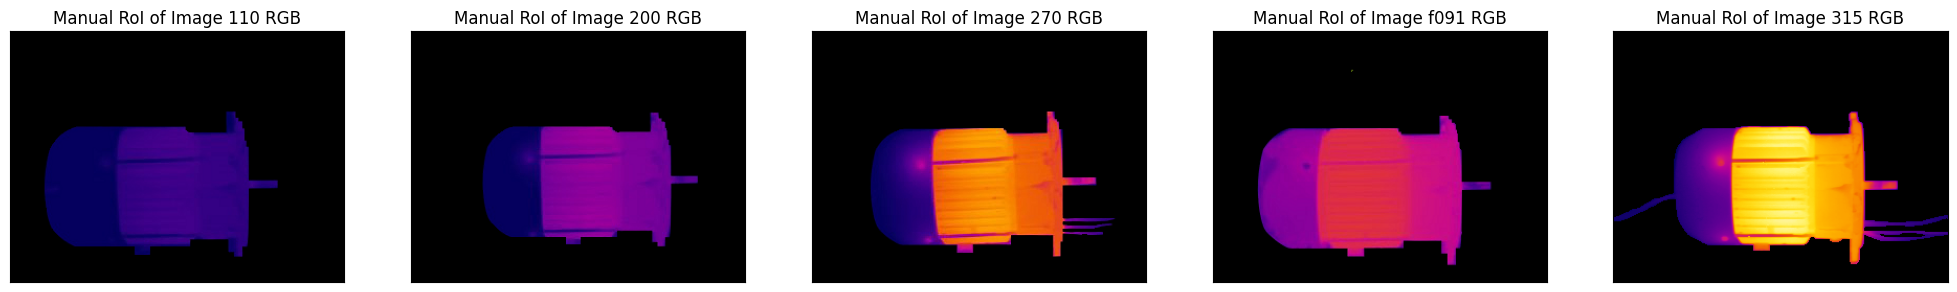

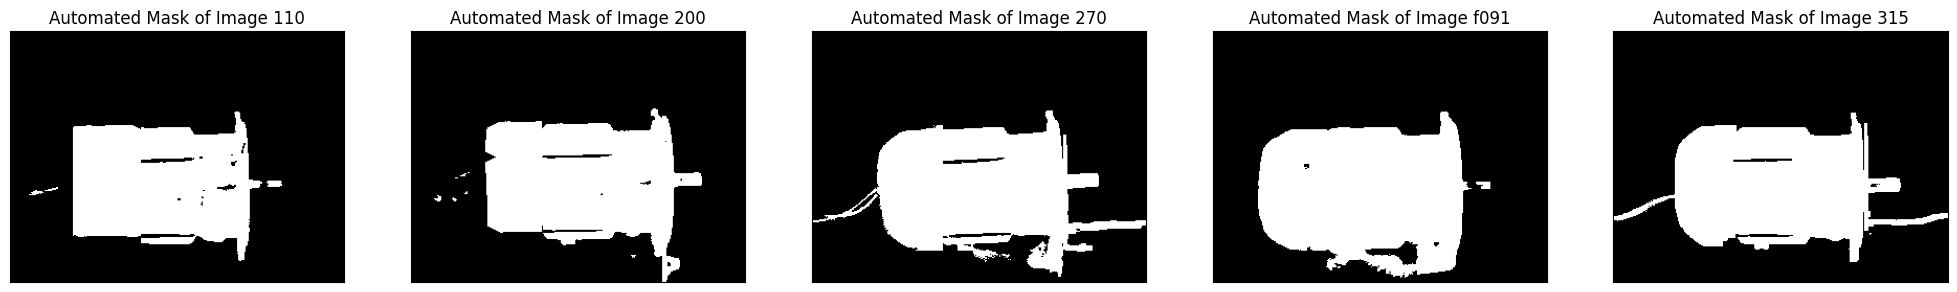

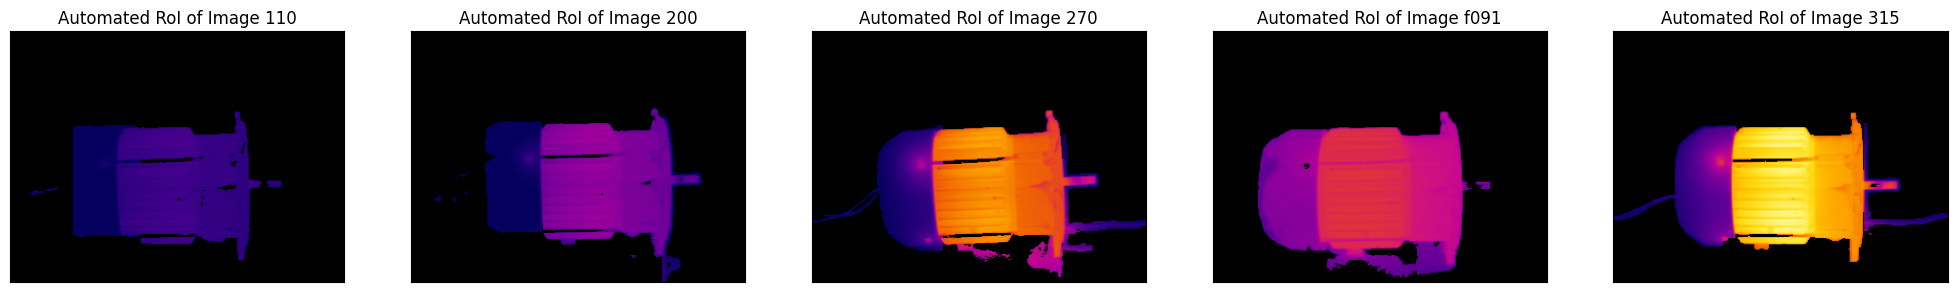

In [32]:
img_110_test = find_RoI(img_110_rgb,3)
img_200_test = find_RoI(img_200_rgb,0)
img_270_test = find_RoI(img_270_rgb,1)
img_f091_test = find_RoI(img_f091_rgb,2)
img_315_test = find_RoI(img_315_rgb,4)

img_110_automated_mask = np.copy(img_110_rgb)
img_200_automated_mask = np.copy(img_200_rgb)
img_270_automated_mask = np.copy(img_270_rgb)
img_f091_automated_mask = np.copy(img_f091_rgb)
img_315_automated_mask = np.copy(img_315_rgb)


img_110_automated_mask[img_110_test  == 0] = [0,0,0]
img_200_automated_mask[img_200_test == 0] = [0,0,0]
img_270_automated_mask[img_270_test == 0] = [0,0,0]
img_f091_automated_mask[img_f091_test == 0] = [0,0,0]
img_315_automated_mask[img_315_test == 0] = [0,0,0]

#----------------- MANUAL MASKS ---------------------------

plt.figure(figsize=(25,5)) # Create figure of dimensions 25 x 5

plt.subplot(151) # Locate mask
plt.title('Manual Mask of Image 110') # Title
plt.imshow(manual_mask_110_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(152) # Locate mask
plt.title('Manual Mask of Image 200') # Title
plt.imshow(manual_mask_200_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(153) # Locate mask
plt.title('Manual Mask of Image 270') # Title
plt.imshow(manual_mask_270_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(154) # Locate mask
plt.title('Manual Mask of Image f091') # Title
plt.imshow(manual_mask_f091_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(155) # Locate mask
plt.title('Manual Mask of Image 315') # Title
plt.imshow(manual_mask_315_BnW, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

# ---------------------- MANUAL ROI -----------------------------------

plt.figure(figsize=(25,5)) # Create figure of dimensions 25 x 5

plt.subplot(151) # Locate mask
plt.title('Manual RoI of Image 110 RGB') # Title
plt.imshow(manual_mask_110_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(152) # Locate mask
plt.title('Manual RoI of Image 200 RGB') # Title
plt.imshow(manual_mask_200_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(153) # Locate mask
plt.title('Manual RoI of Image 270 RGB') # Title
plt.imshow(manual_mask_270_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(154) # Locate mask
plt.title('Manual RoI of Image f091 RGB') # Title
plt.imshow(manual_mask_f091_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(155) # Locate mask
plt.title('Manual RoI of Image 315 RGB') # Title
plt.imshow(manual_mask_315_rgb, cmap='jet') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images


# ---------------------- AUTOMATED MASKS ------------------------------

plt.figure(figsize=(25,5)) # Create figure of dimensions 25 x 5

plt.subplot(151) # Locate mask
plt.title('Automated Mask of Image 110') # Title
plt.imshow(img_110_test, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(152) # Locate mask
plt.title('Automated Mask of Image 200') # Title
plt.imshow(img_200_test, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(153) # Locate mask
plt.title('Automated Mask of Image 270') # Title
plt.imshow(img_270_test, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(154) # Locate mask
plt.title('Automated Mask of Image f091') # Title
plt.imshow(img_f091_test, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(155) # Locate mask
plt.title('Automated Mask of Image 315') # Title
plt.imshow(img_315_test, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

# ---------------------- AUTOMATED ROI ----------------------------------

plt.figure(figsize=(25,5)) # Create figure of dimensions 25 x 5

plt.subplot(151) # Locate mask
plt.title('Automated RoI of Image 110') # Title
plt.imshow(img_110_automated_mask, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(152) # Locate mask
plt.title('Automated RoI of Image 200') # Title
plt.imshow(img_200_automated_mask, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(153) # Locate mask
plt.title('Automated RoI of Image 270') # Title
plt.imshow(img_270_automated_mask, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(154) # Locate mask
plt.title('Automated RoI of Image f091') # Title
plt.imshow(img_f091_automated_mask, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.subplot(155) # Locate mask
plt.title('Automated RoI of Image 315') # Title
plt.imshow(img_315_automated_mask, cmap='gray') # Select image
plt.xticks([]), plt.yticks([]) # Erase axis

plt.show() # Show plot with images

Comparison between the final resuslt with the manual masks using the Jaccard Score

In [33]:
J_110 = jaccard_score(manual_mask_110_BnW, img_110_test, average='micro')
print("Jaccard score Image 110:", J_110*100, "%")

J_200 = jaccard_score(manual_mask_200_BnW, img_200_test, average='micro')
print("Jaccard score Image 200:", J_200*100, "%")

J_270 = jaccard_score(manual_mask_270_BnW, img_270_test, average='micro')
print("Jaccard score Image 270:", J_270*100, "%")

J_f091 = jaccard_score(manual_mask_f091_BnW, img_f091_test, average='micro')
print("Jaccard score Image f091:", J_f091*100, "%")

J_315 = jaccard_score(manual_mask_315_BnW, img_315_test, average='micro')
print("Jaccard score Image 315:", J_315*100, "%")

Jaccard score Image 110: 79.12290151719185 %
Jaccard score Image 200: 87.65154477903793 %
Jaccard score Image 270: 82.09624086320919 %
Jaccard score Image f091: 89.76564447768635 %
Jaccard score Image 315: 89.37308868501529 %


# Failure Classification

## Failure Classification with no segmentation of the RoI

We'll start by taking only the columns of interest: max_value, min_value, mean_value, std_value.

In [88]:
dataset_transformer_classification_x = dataset_motor[["max_value","min_value","mean_value","std_value","temp_label"]]
dataset_transformer_classification_y = dataset_motor['label']

Now, we're going to create the train and test set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(dataset_motor_classification_x, dataset_motor_classification_y, test_size=0.2, random_state=1)

### K-Nearest-Neighbors

Implementation of the model

In [90]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
y_pred_KNN = neigh.predict(X_test)

Classification Report

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       1.00      1.00      1.00         7
     A&C&B30       0.92      1.00      0.96        11
       A&C10       0.67      0.80      0.73         5
       A&C30       1.00      1.00      1.00         4
         A10       0.90      0.82      0.86        11
         A30       1.00      0.91      0.95        11
         A50       1.00      1.00      1.00         6
         Fan       1.00      1.00      1.00         5
      Noload       0.50      1.00      0.67         1
     Rotor-0       1.00      0.86      0.92         7

    accuracy                           0.93        74
   macro avg       0.91      0.94      0.92        74
weighted avg       0.94      0.93      0.94        74



In [93]:
report = classification_report(y_test, y_pred_KNN, output_dict=True)

In [95]:
KNN_accuracy = report['accuracy']

Confusion Matrix

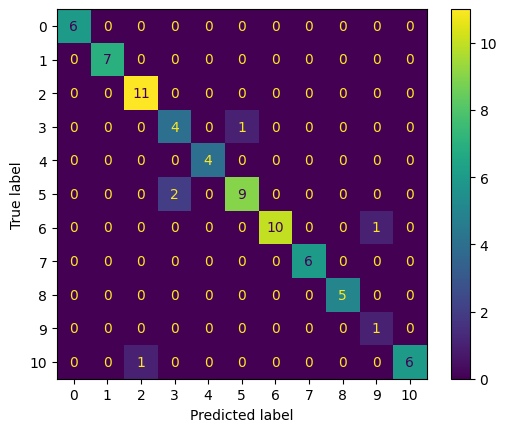

In [96]:
c_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_KNN)
disp.plot()
plt.show()

### Support Vector Machine


Implementation of the model

In [100]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [101]:
y_pred_svm = svm_clf.predict(X_test)

Classification Report

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       0.00      0.00      0.00         7
     A&C&B30       0.62      0.91      0.74        11
       A&C10       0.31      1.00      0.48         5
       A&C30       1.00      1.00      1.00         4
         A10       0.00      0.00      0.00        11
         A30       0.58      1.00      0.73        11
         A50       0.75      1.00      0.86         6
         Fan       1.00      1.00      1.00         5
      Noload       0.00      0.00      0.00         1
     Rotor-0       0.00      0.00      0.00         7

    accuracy                           0.64        74
   macro avg       0.48      0.63      0.53        74
weighted avg       0.46      0.64      0.52        74



In [103]:
report = classification_report(y_test, y_pred_svm, output_dict=True)

In [104]:
svm_accuracy = report['accuracy']

Confusion Matrix

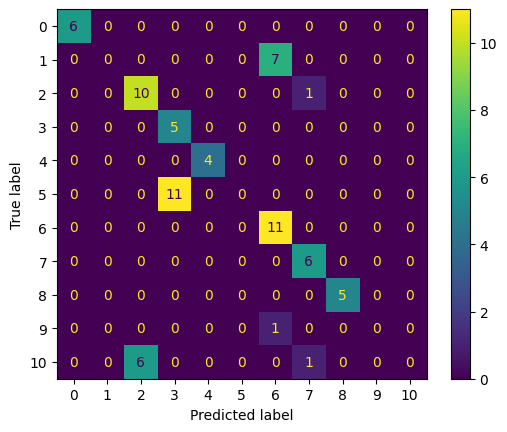

In [105]:
c_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_svm)
disp.plot()
plt.show()

### Desicion tree

Implementation of the model

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [107]:
y_pred_dt = dt_clf.predict(X_test)

Classification Report

In [108]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       1.00      1.00      1.00         7
     A&C&B30       1.00      1.00      1.00        11
       A&C10       0.80      0.80      0.80         5
       A&C30       1.00      1.00      1.00         4
         A10       0.91      0.91      0.91        11
         A30       1.00      0.91      0.95        11
         A50       1.00      1.00      1.00         6
         Fan       1.00      1.00      1.00         5
      Noload       0.50      1.00      0.67         1
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.96        74
   macro avg       0.93      0.97      0.94        74
weighted avg       0.97      0.96      0.96        74



In [109]:
report = classification_report(y_test, y_pred_dt, output_dict=True)

In [110]:
dt_accuracy = report['accuracy']

Confusion Matrix

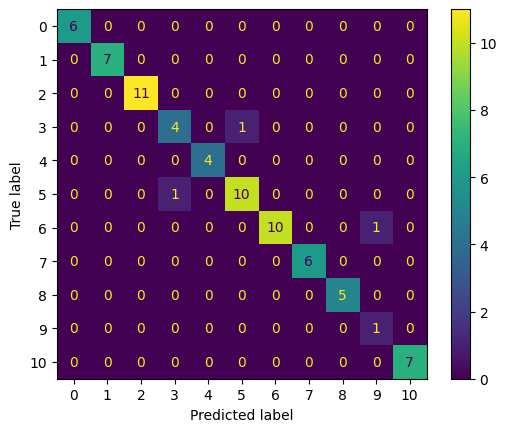

In [111]:
c_matrix_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_dt)
disp.plot()
plt.show()

### Random Forest

Implementation of the model

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [113]:
y_pred_rf = rf_clf.predict(X_test)

Classification Report

In [114]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       1.00      1.00      1.00         7
     A&C&B30       1.00      1.00      1.00        11
       A&C10       1.00      0.80      0.89         5
       A&C30       1.00      1.00      1.00         4
         A10       0.92      1.00      0.96        11
         A30       1.00      0.91      0.95        11
         A50       1.00      1.00      1.00         6
         Fan       1.00      1.00      1.00         5
      Noload       0.50      1.00      0.67         1
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.97        74
   macro avg       0.95      0.97      0.95        74
weighted avg       0.98      0.97      0.97        74



In [115]:
report = classification_report(y_test, y_pred_rf, output_dict=True)

In [116]:
rf_accuracy = report['accuracy']

Confusion Matrix

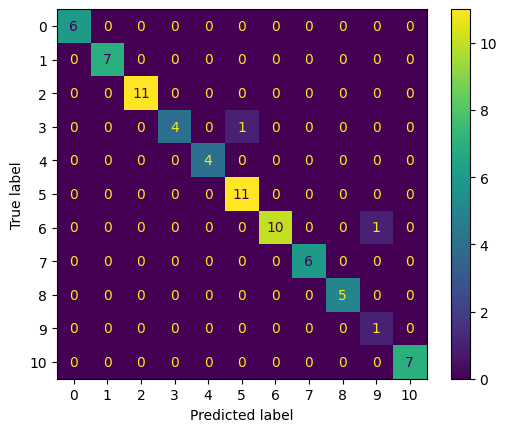

In [117]:
c_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_rf)
disp.plot()
plt.show()

### Naive Bayes

Implementation of the model

In [118]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB(force_alpha=True)
nb_clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [119]:
y_pred_nb = nb_clf.predict(X_test)

Classification Report

In [120]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

       A&B50       0.75      1.00      0.86         6
     A&C&B10       0.00      0.00      0.00         7
     A&C&B30       1.00      0.82      0.90        11
       A&C10       0.56      1.00      0.71         5
       A&C30       1.00      1.00      1.00         4
         A10       1.00      0.64      0.78        11
         A30       0.58      1.00      0.73        11
         A50       1.00      1.00      1.00         6
         Fan       1.00      1.00      1.00         5
      Noload       0.00      0.00      0.00         1
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.81        74
   macro avg       0.72      0.77      0.73        74
weighted avg       0.78      0.81      0.77        74



In [121]:
report = classification_report(y_test, y_pred_nb, output_dict=True)

In [122]:
nb_accuracy = report['accuracy']

Confusion Matrix

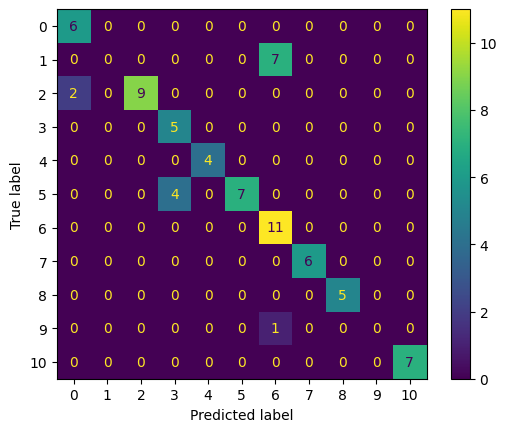

In [123]:
c_matrix_nb = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_nb)
disp.plot()
plt.show()

### Neural Networks - (Multilayer Perceptron)

Implementation of the model

In [127]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(14, 10))
nn_clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(14, 10), solver='lbfgs')

In [128]:
y_pred_nn = nn_clf.predict(X_test)

Classification Report

In [129]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

       A&B50       0.55      1.00      0.71         6
     A&C&B10       1.00      1.00      1.00         7
     A&C&B30       1.00      0.55      0.71        11
       A&C10       0.31      1.00      0.48         5
       A&C30       0.57      1.00      0.73         4
         A10       0.00      0.00      0.00        11
         A30       1.00      0.45      0.62        11
         A50       1.00      0.83      0.91         6
         Fan       1.00      0.40      0.57         5
      Noload       0.14      1.00      0.25         1
     Rotor-0       0.88      1.00      0.93         7

    accuracy                           0.65        74
   macro avg       0.68      0.75      0.63        74
weighted avg       0.72      0.65      0.63        74



In [130]:
report = classification_report(y_test, y_pred_nn, output_dict=True)

In [131]:
nn_accuracy = report['accuracy']

Confusion Matrix

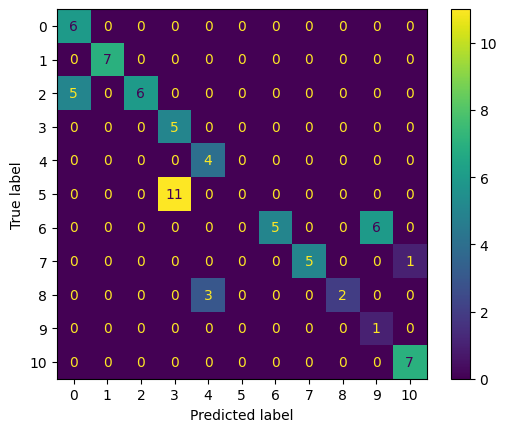

In [132]:
c_matrix_nn = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_nn)
disp.plot()
plt.show()

### No segmentation results summary

In [133]:
no_segmentation_accuracy = [KNN_accuracy,svm_accuracy,dt_accuracy,rf_accuracy,nb_accuracy,nn_accuracy]
no_segmentation_accuracy

[0.9324324324324325,
 0.6351351351351351,
 0.9594594594594594,
 0.972972972972973,
 0.8108108108108109,
 0.6486486486486487]

## Failure Classification with segmentation of the RoI

Get RoI of all the images and make dataset of segmented images

In [135]:
segmented_dataset_motor = dataset_motor[["filename","temp_label","clusters","label"]] # Create dataset for the motor

max_values = [] # list to store max value
min_values = [] # list to store min value
mean_values = [] # list to store mean value
std_values = [] # list to store standard deviation

for i in range(len(dataset_motor["image_data_BGR"])):
    img_bgr = np.array(reverse_img_vectorization(dataset_motor["image_data_BGR"][i], 240, 320, 3), dtype=np.uint8)# reverse_image_vector
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)# convert to RGB
    img_RoI = find_RoI(img_rgb,dataset_motor["clusters"][i])# segment image
    segmented_image = np.copy(img_rgb)
    segmented_image[img_RoI  == 0] = [0,0,0]
    image_gray = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY).tolist()# convert to gray scale
    image_RoI = []
    for k in image_gray:
      for i in k:
        if i != 0:
          image_RoI.append(i)
    image_RoI = np.array(image_RoI)

    # Get values
    max_value = image_RoI.max()
    min_value = image_RoI.min()
    mean_value = np.mean(image_RoI)
    std_value = np.std(image_RoI)

    # Add values to lists
    max_values.append(max_value)
    min_values.append(min_value)
    mean_values.append(mean_value)
    std_values.append(std_value)


segmented_dataset_motor['max_value'] = max_values
segmented_dataset_motor['min_value'] = min_values
segmented_dataset_motor['mean_value'] = mean_values
segmented_dataset_motor['std_value'] = std_values

segmented_dataset_motor

,filename,temp_label,clusters,label,max_value,min_value,mean_value,std_value
0,r057.bmp,1,3,Rotor-0,213,24,94.151432,69.184671
1,r038.bmp,1,0,Rotor-0,200,21,86.628686,64.974307
2,r055.bmp,1,3,Rotor-0,213,24,92.274393,68.432171
3,r050.bmp,1,3,Rotor-0,210,24,91.970829,68.453206
4,r040.bmp,1,0,Rotor-0,200,21,86.223088,65.314917
...,...,...,...,...,...,...,...,...
364,108.bmp,0,1,A&C&B10,39,14,31.031551,5.037620
365,127.bmp,0,1,A&C&B10,37,14,29.823387,3.882300
366,116.bmp,0,1,A&C&B10,38,14,30.478674,4.535501
367,130.bmp,0,1,A&C&B10,37,14,30.425706,4.075420


Get columns of interest

In [137]:
segmented_motor_classification_x = segmented_dataset_motor[["max_value","min_value","mean_value","std_value","temp_label","clusters"]]
segmented_motor_classification_y = segmented_dataset_motor['label']

Now, we're going to create the train and test set

In [138]:
X_train, X_test, y_train, y_test = train_test_split(segmented_motor_classification_x, segmented_motor_classification_y, test_size=0.2, random_state=0)

### K-Nearest-Neighbors

Implementation of the model

In [139]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [140]:
y_pred_KNN = neigh.predict(X_test)

Classification Report

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       1.00      1.00      1.00         4
     A&C&B30       1.00      1.00      1.00        10
       A&C10       0.75      1.00      0.86         3
       A&C30       1.00      1.00      1.00         9
         A10       1.00      0.83      0.91         6
         A30       1.00      1.00      1.00         8
         A50       1.00      1.00      1.00         7
         Fan       1.00      1.00      1.00        10
      Noload       1.00      1.00      1.00         4
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [142]:
report = classification_report(y_test, y_pred_KNN, output_dict=True)

In [143]:
KNN_accuracy = report['accuracy']

Confusion Matrix

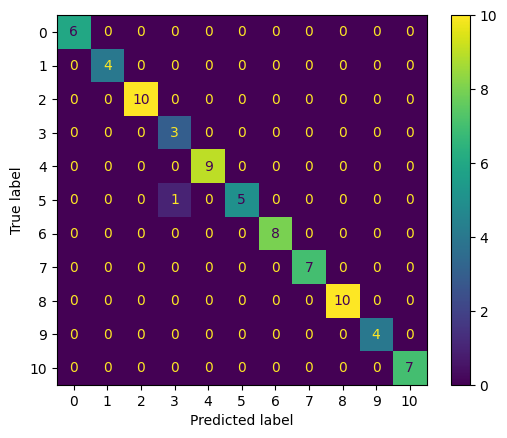

In [144]:
c_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_KNN)
disp.plot()
plt.show()

### Support Vector Machine


Implementation of the model

In [145]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [146]:
y_pred_svm = svm_clf.predict(X_test)

Classification Report

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       0.00      0.00      0.00         4
     A&C&B30       1.00      1.00      1.00        10
       A&C10       0.75      1.00      0.86         3
       A&C30       1.00      1.00      1.00         9
         A10       1.00      0.83      0.91         6
         A30       0.50      1.00      0.67         8
         A50       1.00      1.00      1.00         7
         Fan       1.00      1.00      1.00        10
      Noload       0.00      0.00      0.00         4
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.88        74
   macro avg       0.75      0.80      0.77        74
weighted avg       0.83      0.88      0.84        74



In [148]:
report = classification_report(y_test, y_pred_svm, output_dict=True)

In [149]:
svm_accuracy = report['accuracy']

Confusion Matrix

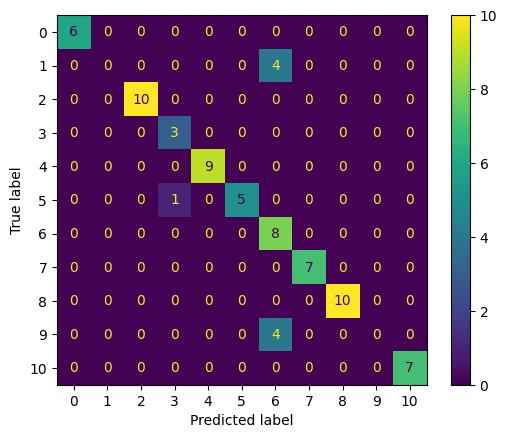

In [150]:
c_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_svm)
disp.plot()
plt.show()

### Desicion tree

Implementation of the model

In [151]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [152]:
y_pred_dt = dt_clf.predict(X_test)

Classification Report

In [153]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       1.00      1.00      1.00         4
     A&C&B30       1.00      1.00      1.00        10
       A&C10       0.75      1.00      0.86         3
       A&C30       1.00      1.00      1.00         9
         A10       1.00      0.83      0.91         6
         A30       1.00      1.00      1.00         8
         A50       1.00      1.00      1.00         7
         Fan       1.00      1.00      1.00        10
      Noload       1.00      1.00      1.00         4
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [154]:
report = classification_report(y_test, y_pred_dt, output_dict=True)

In [155]:
dt_accuracy = report['accuracy']

Confusion Matrix

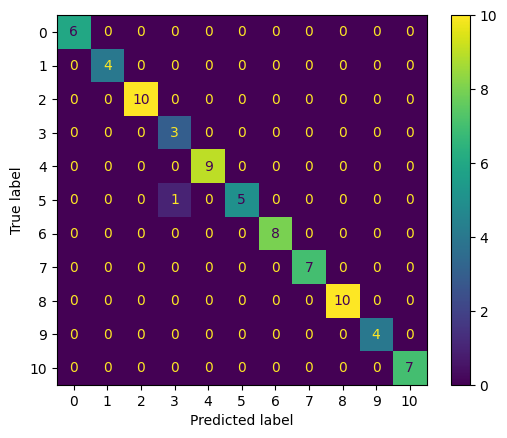

In [156]:
c_matrix_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_dt)
disp.plot()
plt.show()

### Random Forest

Implementation of the model

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [158]:
y_pred_rf = rf_clf.predict(X_test)

Classification Report

In [159]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       A&B50       1.00      1.00      1.00         6
     A&C&B10       1.00      1.00      1.00         4
     A&C&B30       1.00      1.00      1.00        10
       A&C10       0.75      1.00      0.86         3
       A&C30       1.00      1.00      1.00         9
         A10       1.00      0.83      0.91         6
         A30       1.00      1.00      1.00         8
         A50       1.00      1.00      1.00         7
         Fan       1.00      1.00      1.00        10
      Noload       1.00      1.00      1.00         4
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [160]:
report = classification_report(y_test, y_pred_rf, output_dict=True)

In [161]:
rf_accuracy = report['accuracy']

Confusion Matrix

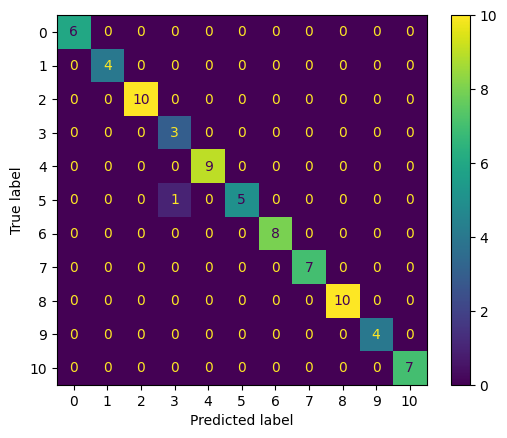

In [162]:
c_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_rf)
disp.plot()
plt.show()

### Naive Bayes

Implementation of the model

In [163]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB(force_alpha=True)
nb_clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [164]:
y_pred_nb = nb_clf.predict(X_test)

Classification Report

In [165]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

       A&B50       0.60      1.00      0.75         6
     A&C&B10       1.00      0.25      0.40         4
     A&C&B30       0.00      0.00      0.00        10
       A&C10       0.75      1.00      0.86         3
       A&C30       1.00      1.00      1.00         9
         A10       1.00      0.83      0.91         6
         A30       0.57      1.00      0.73         8
         A50       0.54      1.00      0.70         7
         Fan       1.00      1.00      1.00        10
      Noload       1.00      0.25      0.40         4
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.77        74
   macro avg       0.77      0.76      0.70        74
weighted avg       0.73      0.77      0.71        74



In [166]:
report = classification_report(y_test, y_pred_nb, output_dict=True)

In [167]:
nb_accuracy = report['accuracy']

Confusion Matrix

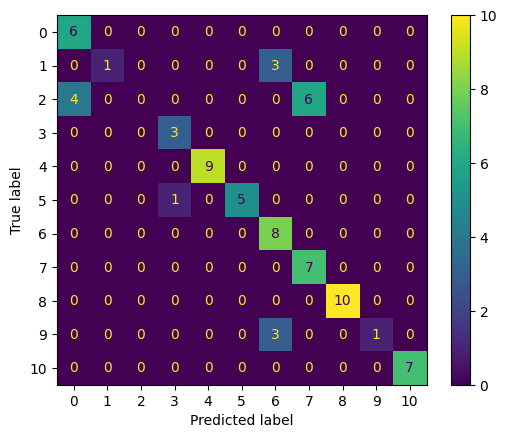

In [168]:
c_matrix_nb = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_nb)
disp.plot()
plt.show()

### Neural Networks - (Multilayer Perceptron)

Implementation of the model

In [179]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(11, 10), random_state=1)
nn_clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(11, 10), random_state=1,
              solver='lbfgs')

In [180]:
y_pred_nn = nn_clf.predict(X_test)

Classification Report

In [181]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

       A&B50       0.60      1.00      0.75         6
     A&C&B10       0.43      0.75      0.55         4
     A&C&B30       1.00      0.60      0.75        10
       A&C10       0.00      0.00      0.00         3
       A&C30       0.90      1.00      0.95         9
         A10       0.67      1.00      0.80         6
         A30       0.75      0.75      0.75         8
         A50       1.00      1.00      1.00         7
         Fan       1.00      1.00      1.00        10
      Noload       0.00      0.00      0.00         4
     Rotor-0       1.00      1.00      1.00         7

    accuracy                           0.81        74
   macro avg       0.67      0.74      0.69        74
weighted avg       0.78      0.81      0.78        74



In [182]:
report = classification_report(y_test, y_pred_nn, output_dict=True)

In [183]:
nn_accuracy = report['accuracy']

Confusion Matrix

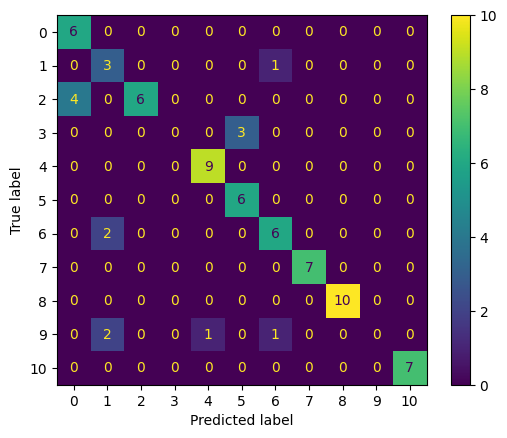

In [184]:
c_matrix_nn = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_nn)
disp.plot()
plt.show()

In [185]:
segmentation_accuracy = [KNN_accuracy,svm_accuracy,dt_accuracy,rf_accuracy,nb_accuracy,nn_accuracy]
segmentation_accuracy

[0.9864864864864865,
 0.8783783783783784,
 0.9864864864864865,
 0.9864864864864865,
 0.7702702702702703,
 0.8108108108108109]

## Final Summary

In [186]:
method_index = ['KNN','SVM','Desicion Tree','Random Forest','Naive Bayes', 'Neural Network']
summary_accuracy_data = [[segmentation_accuracy[0],no_segmentation_accuracy[0], segmentation_accuracy[0]- no_segmentation_accuracy[0]],
                [segmentation_accuracy[1],no_segmentation_accuracy[1], segmentation_accuracy[1]- no_segmentation_accuracy[1]],
                [segmentation_accuracy[2],no_segmentation_accuracy[2], segmentation_accuracy[2]- no_segmentation_accuracy[2]],
                [segmentation_accuracy[3],no_segmentation_accuracy[3], segmentation_accuracy[3]- no_segmentation_accuracy[3]],
                [segmentation_accuracy[4],no_segmentation_accuracy[4], segmentation_accuracy[4]- no_segmentation_accuracy[4]],
                [segmentation_accuracy[5],no_segmentation_accuracy[5], segmentation_accuracy[5]- no_segmentation_accuracy[5]]]
df_summary_accuracy = pd.DataFrame(summary_accuracy_data,index = method_index,columns=['Accuracy with Segmentation','Accuracy with no Segmentation', 'Difference of Accuracy'])

In [187]:
df_summary_accuracy

,Accuracy with Segmentation,Accuracy with no Segmentation,Difference of Accuracy
KNN,0.986486,0.932432,0.054054
SVM,0.878378,0.635135,0.243243
Desicion Tree,0.986486,0.959459,0.027027
Random Forest,0.986486,0.972973,0.013514
Naive Bayes,0.770270,0.810811,-0.040541
Neural Network,0.810811,0.648649,0.162162
